In [1]:
import sys
sys.path.append('../..')

### 1.1 Llama-7b-chat-hf

In [2]:
from experiments.caa_repro.utils.helpers import get_model_name

model_name = get_model_name(use_base_model=False, model_size="7b")
print(model_name)

meta-llama/Llama-2-7b-chat-hf


In [3]:
import matplotlib.pyplot as plt 
from experiments.caa_repro.utils.helpers import get_save_vectors_path
from experiments.caa_repro.utils.helpers import make_tensor_save_suffix
from experiments.caa_repro.utils.helpers import get_model_name
from steering_vectors import SteeringVector
import torch

def our_vectors_path():
    return get_save_vectors_path()

def original_vectors_path():
    return our_vectors_path().parent / "original_vectors"

model_name = get_model_name(use_base_model=False, model_size="7b")

original_vectors = {}
for layer_id in range(32):
    layer_act = torch.load(
        original_vectors_path() / f"vec_layer_{make_tensor_save_suffix(layer_id, model_name)}.pt"
    ).float()
    original_vectors[layer_id] = layer_act.clone()
original_vector = SteeringVector(original_vectors)

our_vectors = {}
for layer_id in range(32):
    layer_act = torch.load(
        our_vectors_path() / f"vec_layer_{make_tensor_save_suffix(layer_id, model_name)}.pt"
    ).float()
    our_vectors[layer_id] = layer_act.clone()
our_vector = SteeringVector(our_vectors)


In [4]:
print(original_vectors[0].shape)
print(our_vectors[0].shape)

torch.Size([4096])
torch.Size([4096])


[0.9978601  0.9931169  0.98570037 0.97377926 0.97054374 0.9653271
 0.95959383 0.96942455 0.965987   0.98631054 0.9970319  0.99890774
 0.9989557  0.99851376 0.99826926 0.99821496 0.9972644  0.99698883
 0.9968514  0.99662066 0.99635184 0.9962918  0.99606764 0.99571085
 0.9953967  0.99506545 0.994654   0.99445474 0.9941548  0.99375385
 0.9935004  0.9925964 ]


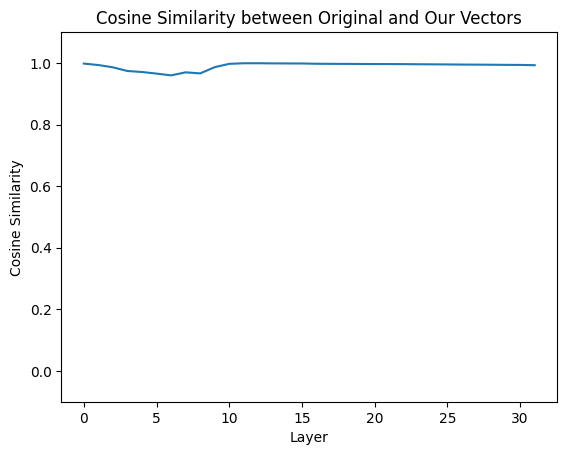

In [5]:
import matplotlib.pyplot as plt

def calculate_cosine_similarity(a: torch.Tensor, b: torch.Tensor):
    return a.dot(b) / (a.norm() * b.norm())

def plot_cos_sim(u: dict[int, torch.Tensor], v: dict[int, torch.Tensor]):
    cosine_similarities = []

    for layer_id in range(32):
        a = u[layer_id]
        b = v[layer_id]
        # print(a.dot(b) / (a.norm() * b.norm()))
        # print(calculate_cosine_similarity(a, b))
        cosine_similarities.append(calculate_cosine_similarity(a, b))

    cosine_similarities = torch.tensor(cosine_similarities).float().numpy()
    print(cosine_similarities)
    plt.clf()
    plt.ylim((-0.1, 1.1))
    plt.title("Cosine Similarity between Original and Our Vectors")
    plt.ylabel("Cosine Similarity")
    plt.xlabel("Layer")
    plt.plot(cosine_similarities)

plot_cos_sim(our_vectors, original_vectors)

[0.9978601  0.9931169  0.98570037 0.97377926 0.97054374 0.9653271
 0.95959383 0.96942455 0.965987   0.98631054 0.9970319  0.99890774
 0.9989557  0.99851376 0.99826926 0.99821496 0.9972644  0.99698883
 0.9968514  0.99662066 0.99635184 0.9962918  0.99606764 0.99571085
 0.9953967  0.99506545 0.994654   0.99445474 0.9941548  0.99375385
 0.9935004  0.9925964 ]


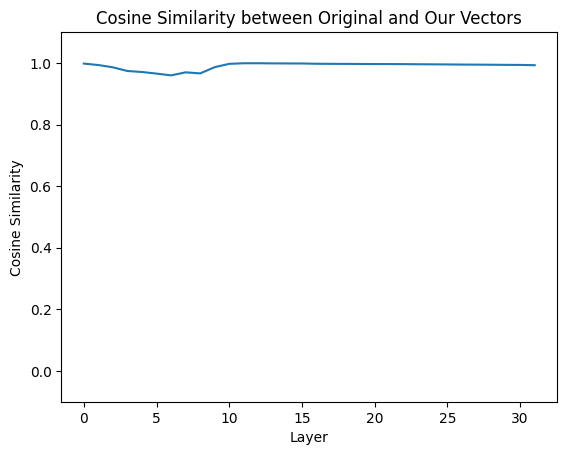

In [6]:
plot_cos_sim(our_vectors, original_vectors)

In [7]:
print(cosine_similarities[0])

NameError: name 'cosine_similarities' is not defined